In [1]:
%load_ext autoreload

%autoreload 2

In [47]:
import os, sys
sys.path.append('..')


from scripts.utils.visualizaion import *
from scripts.data_utils.loaders import load_data
from scripts.data_utils.utils import summarize_data, map_merge_geolocation
from scripts.data_utils.data_preprocessing import preprocess_data
from scripts.data_utils.cleaning import handle_missing_values, clean_data
from scripts.data_utils.data_transformation import normalize_features, encode_categorical_features
from scripts.data_utils.feature_engineering import (
    create_time_features,
    calculate_transaction_velocity,
    compute_fraud_rate_by_signup_delay,
    summarize_signup_to_purchase_delay,
    compute_signup_to_purchase_delay
)

DATAPATH = os.path.join('..', 'resources', 'data')

In [48]:
# Load datasets
fraud_df = load_data(os.path.join(DATAPATH, "Fraud_Data.csv"))
ip_df = load_data(os.path.join(DATAPATH, "IpAddress_to_Country.csv"))
credit_df = load_data(os.path.join(DATAPATH, "creditcard.csv"))
fraud_df.shape, ip_df.shape, credit_df.shape

2025-02-17 10:17:41 - [✅ INFO] - Loading data from ..\resources\data\Fraud_Data.csv
2025-02-17 10:17:42 - [✅ INFO] - Successfully loaded data from ..\resources\data\Fraud_Data.csv
2025-02-17 10:17:42 - [✅ INFO] - Loading data from ..\resources\data\IpAddress_to_Country.csv
2025-02-17 10:17:42 - [✅ INFO] - Successfully loaded data from ..\resources\data\IpAddress_to_Country.csv
2025-02-17 10:17:42 - [✅ INFO] - Loading data from ..\resources\data\creditcard.csv
2025-02-17 10:17:47 - [✅ INFO] - Successfully loaded data from ..\resources\data\creditcard.csv


((151112, 11), (138846, 3), (284807, 31))

In [6]:
# Display basic info
summarize_data(fraud_df)

2025-02-17 09:14:01 - [✅ INFO] - 
--- Data Summary ---
2025-02-17 09:14:02 - [✅ INFO] -                    count  unique                  top   freq  \
user_id         151112.0  151112                  NaN    NaN   
signup_time       151112  151112  2015-02-24 22:55:49      1   
purchase_time     151112  150679  2015-06-08 09:42:04      3   
purchase_value  151112.0     122                  NaN    NaN   
device_id         151112  137956        CQTUVBYIWWWBC     20   
source            151112       3                  SEO  60615   
browser           151112       5               Chrome  61432   
sex               151112       2                    M  88293   
age             151112.0      58                  NaN    NaN   
ip_address      151112.0  143512                  NaN    NaN   
class           151112.0       2                  NaN    NaN   
country                0       0                  NaN    NaN   

                             mean                std           min  \
user_id  

In [7]:
# Display basic information
summarize_data(credit_df)

2025-02-17 09:14:05 - [✅ INFO] - 
--- Data Summary ---
2025-02-17 09:14:07 - [✅ INFO] -            count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.6733

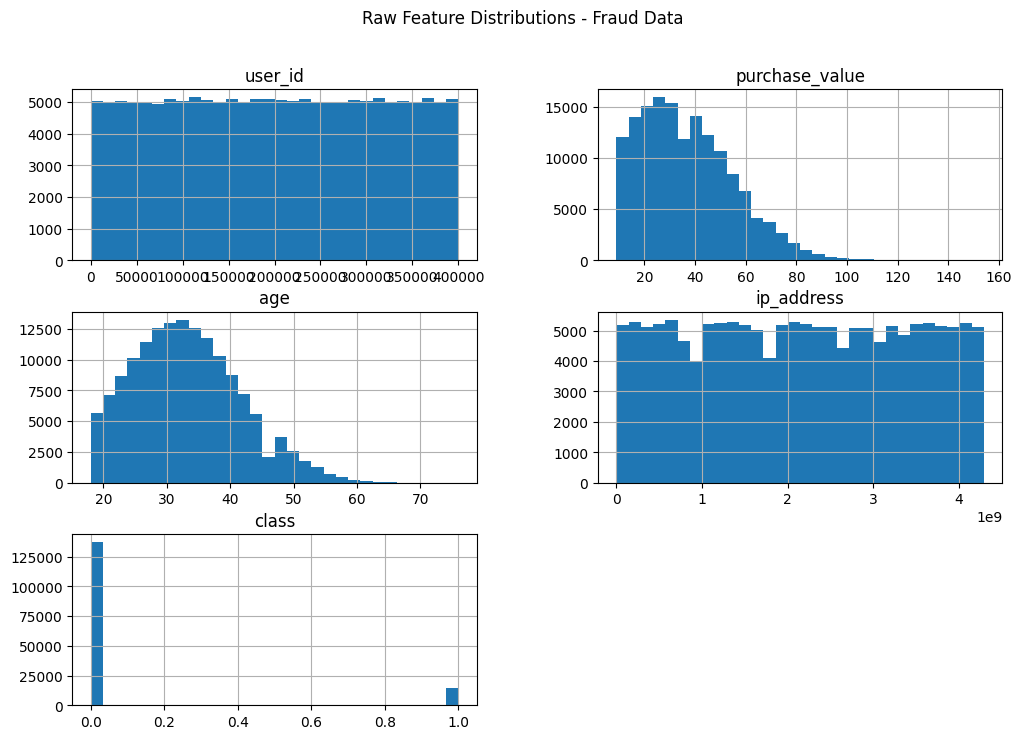

In [8]:
# Raw Feature Distributions for fraud dataset
plot_hist(data=fraud_df, title="Raw Feature Distributions - Fraud Data")

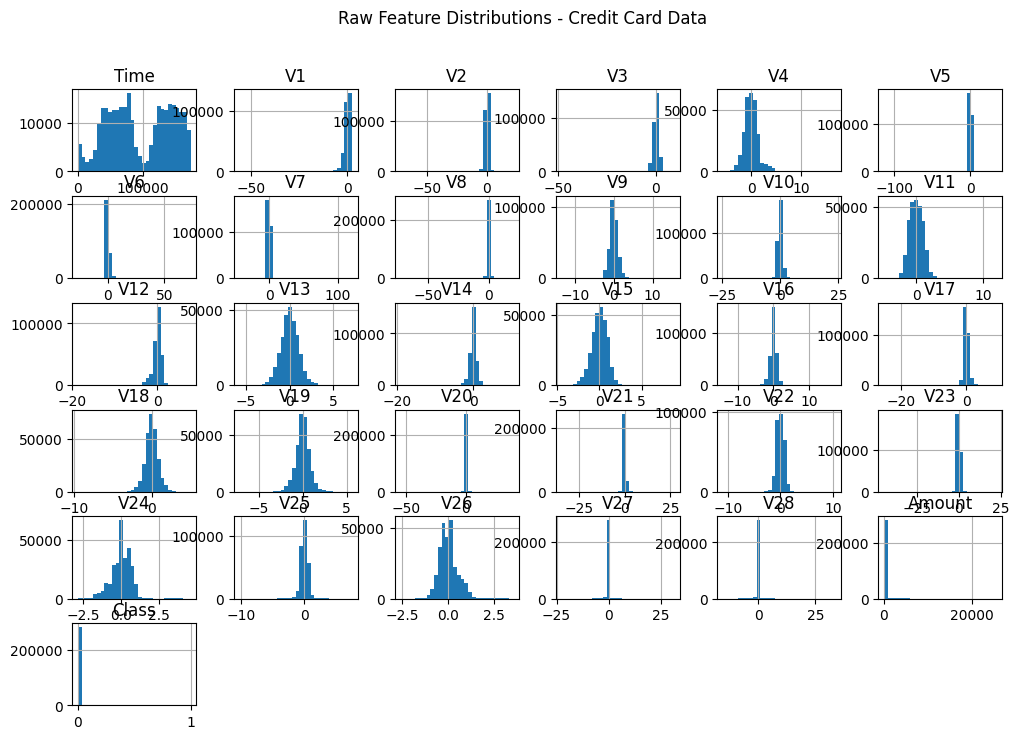

In [9]:
# Raw Feature Distributions for credit dataset
plot_hist(data=credit_df, title="Raw Feature Distributions - Credit Card Data") 

Correlation Analysis

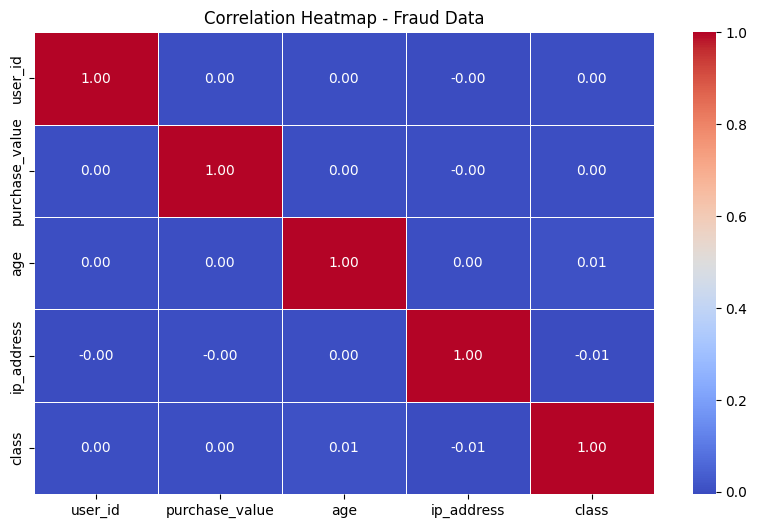

In [10]:
# Correlation Analysis
plot_correlation(fraud_df, title="Correlation Heatmap - Fraud Data")

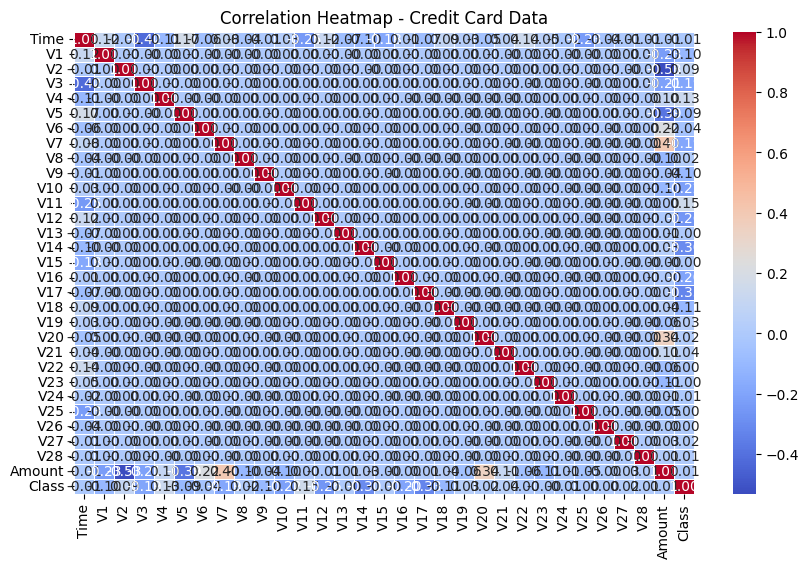

In [11]:
plot_correlation(credit_df, title="Correlation Heatmap - Credit Card Data")

Preprocessing

In [ ]:
# Data Preprocessing
# fraud_df = handle_missing_values(fraud_df)
# fraud_df

In [49]:
fraud_df = clean_data(fraud_df)
fraud_df

2025-02-17 10:19:06 - [✅ INFO] - Removed 0 duplicate rows.
2025-02-17 10:19:06 - [✅ INFO] - Data cleaned: duplicates removed, data types corrected.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


Univariate Analysis - FraudData

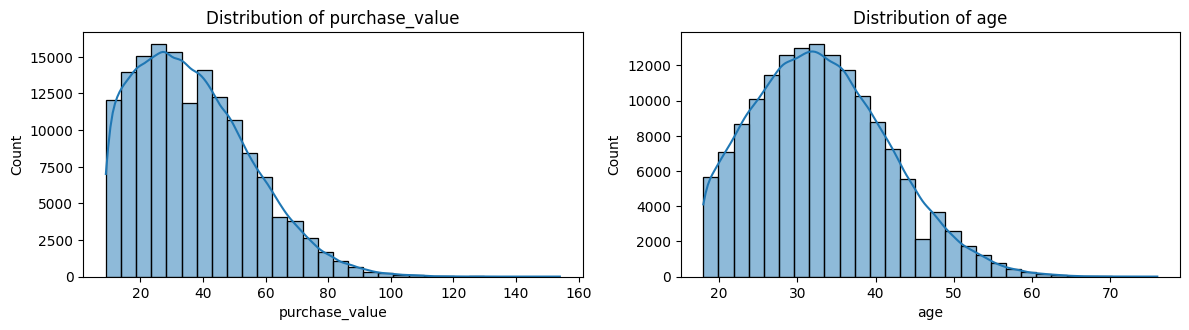

In [13]:
# Numeric Feature Distribution
plot_numerical(fraud_df, ['purchase_value', 'age'])

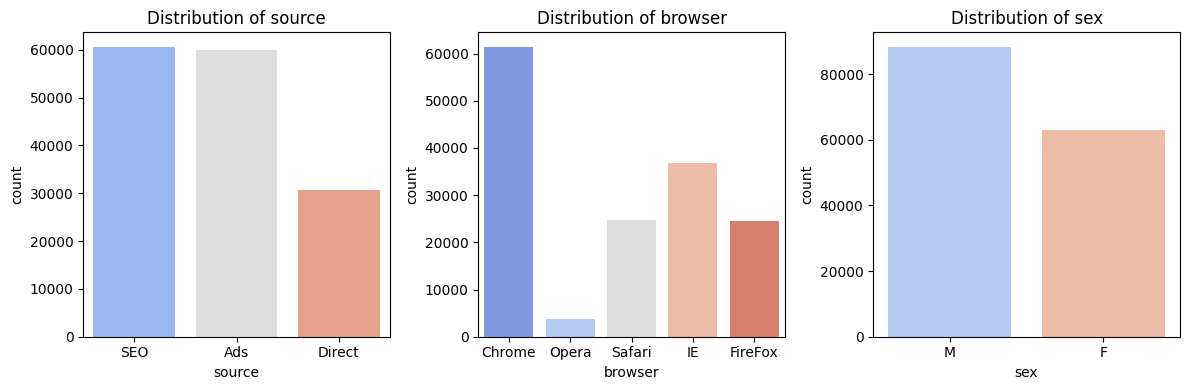

In [14]:
# Categorical Feature Distribution
categorical_features = ['source', 'browser', 'sex']
plot_categorical(fraud_df, categorical_features)

Bivariate Analysis (Fraud vs. Non-Fraud)

2025-02-17 09:14:39 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 09:14:39 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


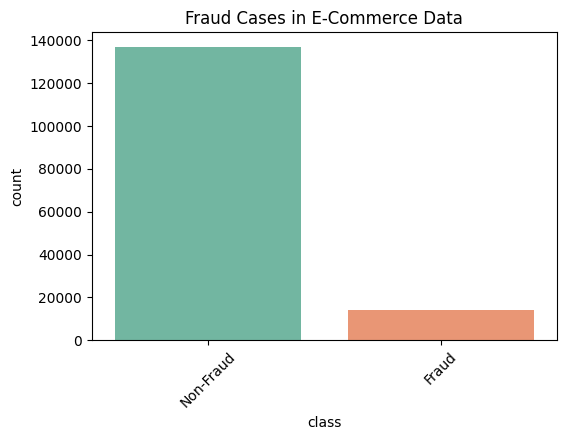

In [15]:
# Fraud Distribution in E-Commerce Data
plot_count(data=fraud_df, column='class', title="Fraud Cases in E-Commerce Data")

2025-02-17 09:14:39 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 09:14:39 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


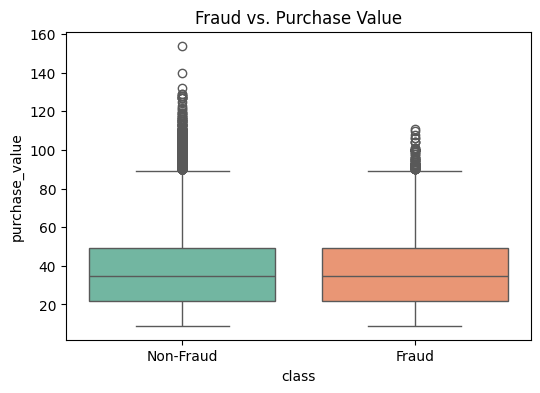

In [16]:
# Fraud vs. Purchase Value
plot_box(data=fraud_df, x='class', y='purchase_value', title="Fraud vs. Purchase Value")

2025-02-17 09:14:40 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 09:14:40 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


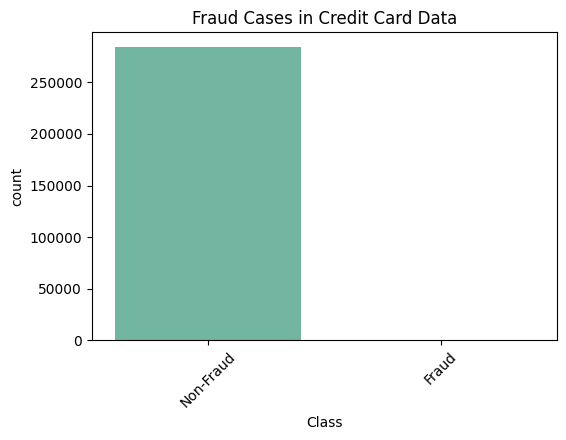

In [17]:
# Fraud Cases in Credit Card Data
plot_count(data=credit_df, column='Class', title="Fraud Cases in Credit Card Data")

In [50]:
# Merge Geolocation Data
fraud_df = map_merge_geolocation(fraud_df, ip_df)
fraud_df

2025-02-17 10:19:16 - [✅ INFO] - Merged fraud transactions dataset with geolocation data. Resulting shape: (151112, 12)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4294673680,0,Unknown
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4294714854,0,Unknown
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4294719533,0,Unknown
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4294822241,0,Unknown


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-8-9\notebooks\..\scripts\utils\visualizaion.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


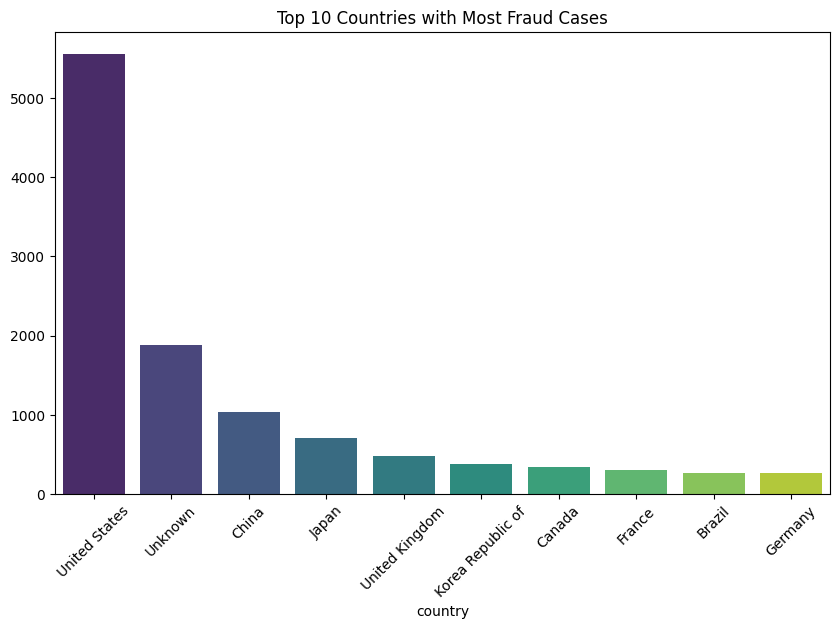

In [51]:
# Geolocation Fraud Analysis
fraud_by_country = fraud_df.groupby("country")["class"].sum().sort_values(ascending=False).head(10)
plot_bar(fraud_by_country, title="Top 10 Countries with Most Fraud Cases")

In [52]:
fraud_df.to_csv(os.path.join(DATAPATH, 'preprocessed', "fraud_preprocessed.csv"), index=False)

Feature Engineering

In [53]:
# Feature Engineering
fraud_df = create_time_features(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown,10,6
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown,17,4
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown,8,1
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown,21,3
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4294673680,0,Unknown,21,4
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4294714854,0,Unknown,4,4
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4294719533,0,Unknown,6,5
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4294822241,0,Unknown,9,4


In [54]:
fraud_df = calculate_transaction_velocity(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,time_diff,transaction_velocity
31545,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,10,5,0.0,0.0
97542,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,21,5,0.0,0.0
12873,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,11,3,0.0,0.0
27671,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,23,2,0.0,0.0
104500,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,20,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54852,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,France,7,2,0.0,0.0
96464,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,Germany,7,3,0.0,0.0
129697,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,Japan,23,4,0.0,0.0
120623,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,United States,20,2,0.0,0.0


In [55]:
fraud_df = compute_signup_to_purchase_delay(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,time_diff,transaction_velocity,signup_to_purchase_hours
31545,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,10,5,0.0,0.0,990.273333
97542,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,21,5,0.0,0.0,2788.855278
12873,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,11,3,0.0,0.0,1852.000278
27671,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,23,2,0.0,0.0,103.136111
104500,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,20,2,0.0,0.0,1286.523611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54852,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,France,7,2,0.0,0.0,2821.596944
96464,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,Germany,7,3,0.0,0.0,1515.588056
129697,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,Japan,23,4,0.0,0.0,2106.290278
120623,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,United States,20,2,0.0,0.0,2387.910556


2025-02-17 10:20:40 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:20:40 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


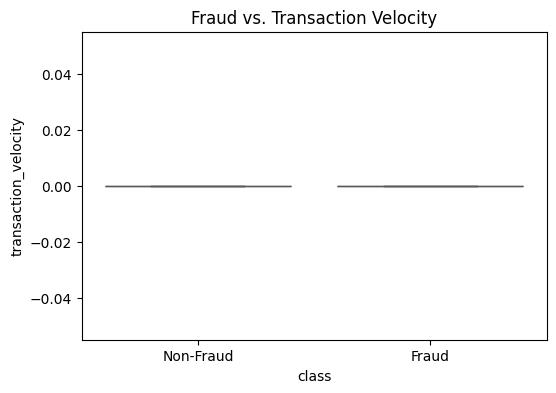

In [56]:
# Fraud vs. Transaction Velocity
plot_box(data=fraud_df, x='class', y='transaction_velocity', title="Fraud vs. Transaction Velocity")

2025-02-17 10:20:41 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:20:41 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


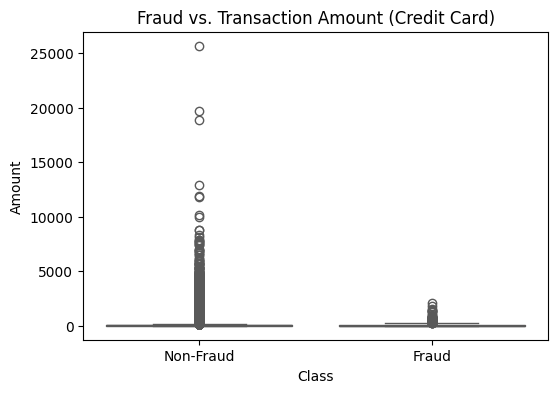

In [57]:
# Transaction Amount Distribution (Fraud vs. Non-Fraud)
plot_box(data=credit_df, x='Class', y='Amount', title="Fraud vs. Transaction Amount (Credit Card)")

In [25]:
# # Fraud by device
# plot_count(data=fraud_df, column="device_id", title="Top 10 Devices Used in Fraud Cases", hue="class", palette="coolwarm", figsize=(10, 5))

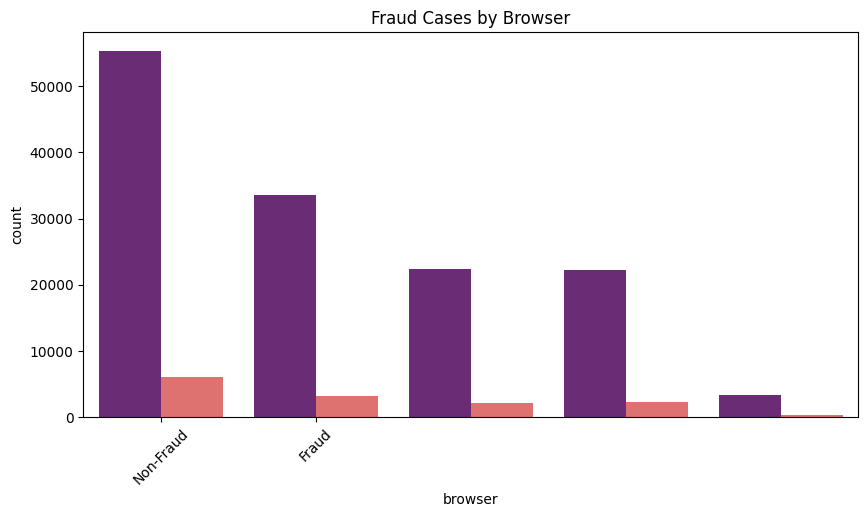

In [58]:
# Fraud by browser
plot_count(data=fraud_df, column="browser", title="Fraud Cases by Browser", hue="class", palette="magma", figsize=(10, 5))

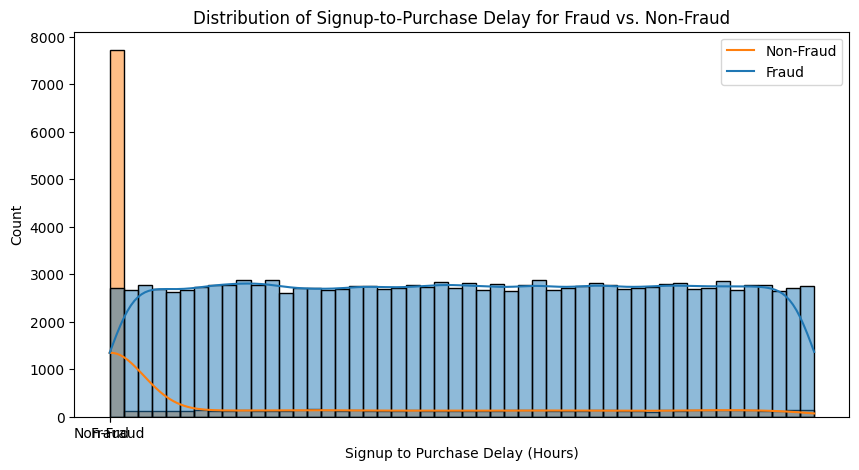

In [59]:
plot_distribution(fraud_df, column="signup_to_purchase_hours", title="Distribution of Signup-to-Purchase Delay for Fraud vs. Non-Fraud", 
                  xlabel="Signup to Purchase Delay (Hours)", ylabel="Count", hue='class')

In [60]:
summarize_signup_to_purchase_delay(fraud_df)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,136961.0,1441.994052,830.163558,0.038056,719.119167,1443.030833,2161.477500,2879.992222
1,14151.0,673.289542,920.496897,0.000278,0.000278,0.000278,1330.697361,2878.874167


In [61]:
compute_fraud_rate_by_signup_delay(fraud_df)

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-8-9\notebooks\..\scripts\data_utils\feature_engineering.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rates = data.groupby("signup_delay_bucket")["class"].mean().reset_index()


,signup_delay_bucket,class
0,<1hr,0.995158
1,1-6hrs,0.033333
2,6-24hrs,0.041049
3,1-3 days,0.040118
4,>3 days,0.045776


2025-02-17 10:20:47 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:20:47 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


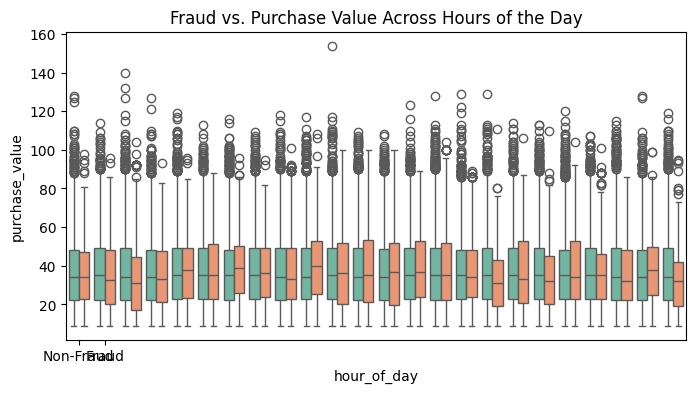

In [62]:
# Fraud Trend Analysis - Hour of Day
plot_box(data=fraud_df, x='hour_of_day', y='purchase_value', hue='class', figsize=(8, 4), 
         title="Fraud vs. Purchase Value Across Hours of the Day")


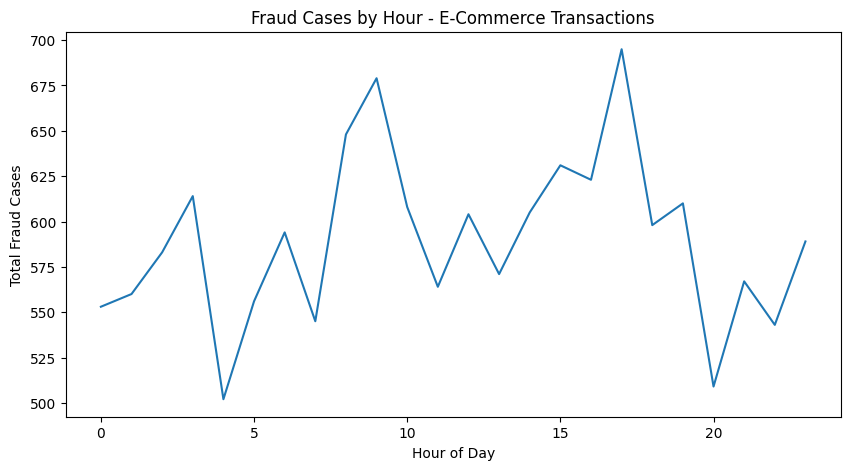

In [63]:
# Fraud cases by hour for e-commerce fraud data
plot_line(data=fraud_df, x='hour_of_day', y='class', title="Fraud Cases by Hour - E-Commerce Transactions", 
          xlabel="Hour of Day", ylabel="Total Fraud Cases")

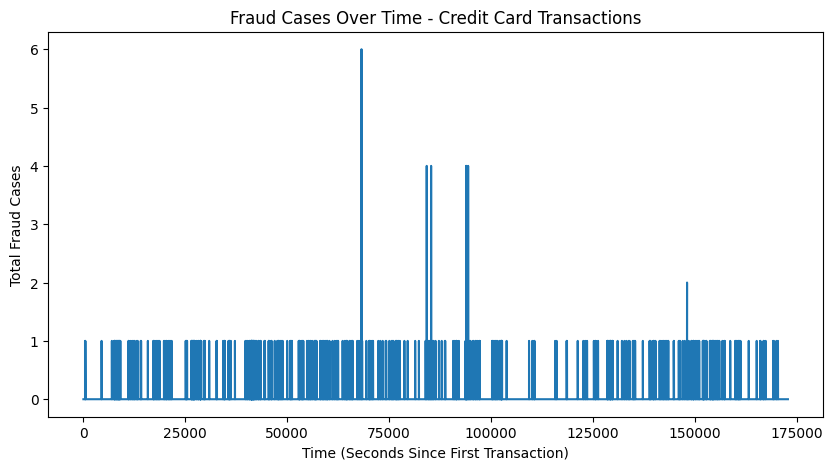

In [64]:
# Fraud cases over time for credit card fraud data
plot_line(data=credit_df, x='Time', y='Class', title="Fraud Cases Over Time - Credit Card Transactions", 
          xlabel="Time (Seconds Since First Transaction)", ylabel="Total Fraud Cases")

In [65]:
# Normalize
numeric_features = ['purchase_value', 'transaction_velocity', 'hour_of_day', 'day_of_week', 'signup_to_purchase_hours']
fraud_df = normalize_features(fraud_df, numeric_features)
fraud_df


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,time_diff,transaction_velocity,signup_to_purchase_hours,signup_delay_bucket
31545,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,0.434783,0.833333,0.0,0.0,0.343846,>3 days
97542,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,0.913043,0.833333,0.0,0.0,0.968355,>3 days
12873,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,0.478261,0.500000,0.0,0.0,0.643057,>3 days
27671,9,2015-05-16 15:58:32,2015-05-20 23:06:42,0.365517,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,1.000000,0.333333,0.0,0.0,0.035811,>3 days
104500,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,0.869565,0.333333,0.0,0.0,0.446711,>3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54852,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,0.503448,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,France,0.304348,0.333333,0.0,0.0,0.979724,>3 days
96464,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,0.075862,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,Germany,0.304348,0.500000,0.0,0.0,0.526247,>3 days
129697,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,0.165517,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,Japan,1.000000,0.666667,0.0,0.0,0.731353,>3 days
120623,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,0.393103,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,United States,0.869565,0.333333,0.0,0.0,0.829138,>3 days


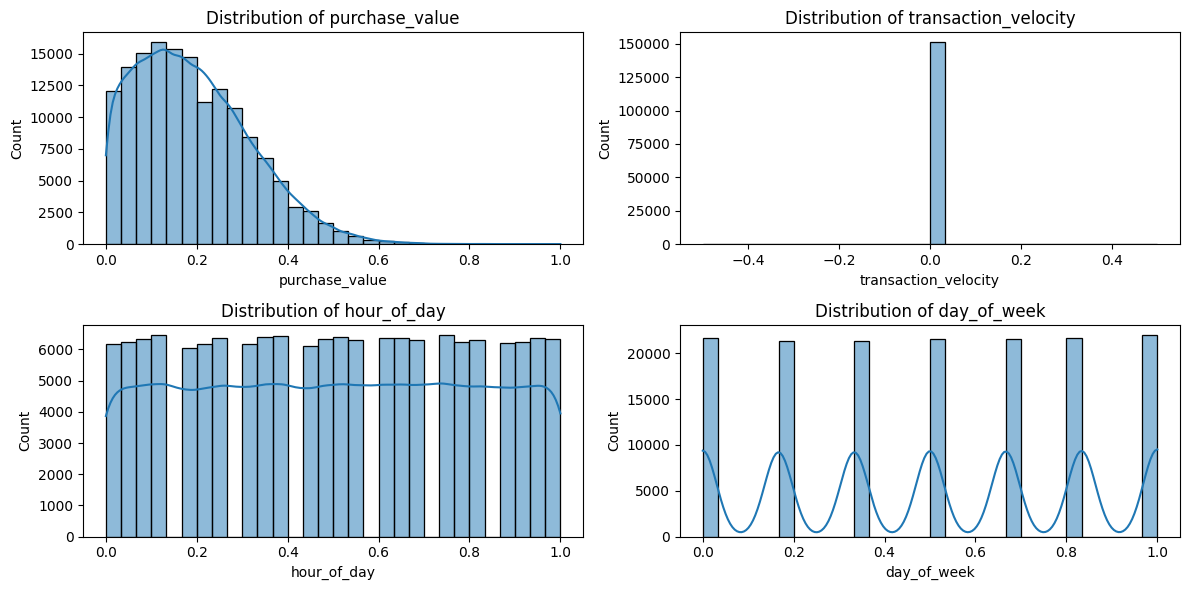

In [66]:
# Numeric Feature Distribution
plot_numerical(fraud_df, ['purchase_value', 'transaction_velocity', 'hour_of_day', 'day_of_week'])

In [71]:
# Encode# Categorical Feature Distribution
categorical_features = ['source', 'browser', 'sex', 'signup_delay_bucket', 'country']
fraud_df = encode_categorical_features(fraud_df, categorical_features)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,time_diff,transaction_velocity,signup_to_purchase_hours,signup_delay_bucket
31545,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,2,0,0,25,880217484,0,171,0.434783,0.833333,0.0,0.0,0.343846,4
97542,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,1,4,0,38,2785906106,0,157,0.913043,0.833333,0.0,0.0,0.968355,4
12873,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,2,0,1,25,356056736,0,171,0.478261,0.500000,0.0,0.0,0.643057,4
27671,9,2015-05-16 15:58:32,2015-05-20 23:06:42,0.365517,IEZOHXPZBIRTE,2,1,1,21,759104706,0,172,1.000000,0.333333,0.0,0.0,0.035811,4
104500,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,0,4,1,19,2985180352,0,107,0.869565,0.333333,0.0,0.0,0.446711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54852,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,0.503448,CNVFEDSCAWXGS,1,4,1,59,1549469282,0,60,0.304348,0.333333,0.0,0.0,0.979724,4
96464,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,0.075862,XJMTBAKOHKTGR,1,2,0,37,2755338335,0,64,0.304348,0.500000,0.0,0.0,0.526247,4
129697,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,0.165517,RYXNXTOXIYRQG,1,1,0,35,3701447303,0,84,1.000000,0.666667,0.0,0.0,0.731353,4
120623,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,0.393103,XFNGDCCMMBTCB,1,0,1,48,3454704355,0,171,0.869565,0.333333,0.0,0.0,0.829138,4


2025-02-17 10:25:13 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:13 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:13 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:13 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:14 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as 

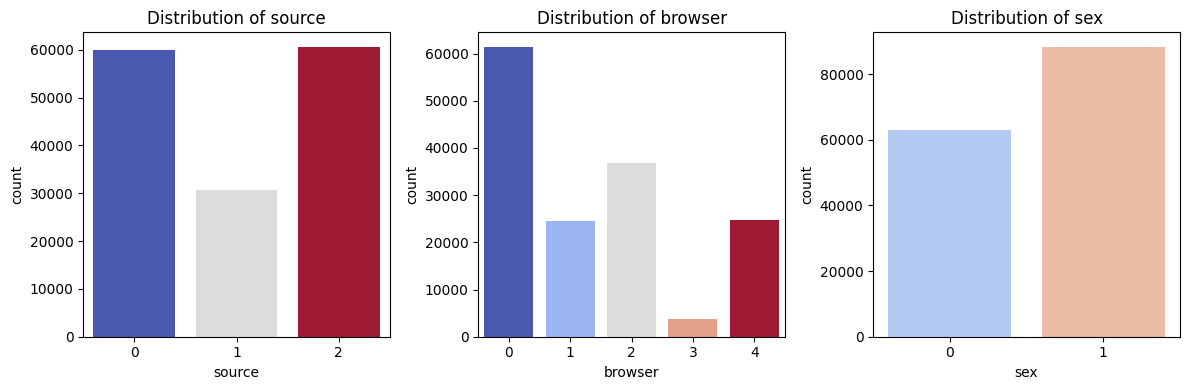

In [73]:
# Categorical Feature Distribution
plot_categorical_features = ['source', 'browser', 'sex']
plot_categorical(fraud_df, plot_categorical_features)

2025-02-17 10:25:51 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:51 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:52 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:53 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


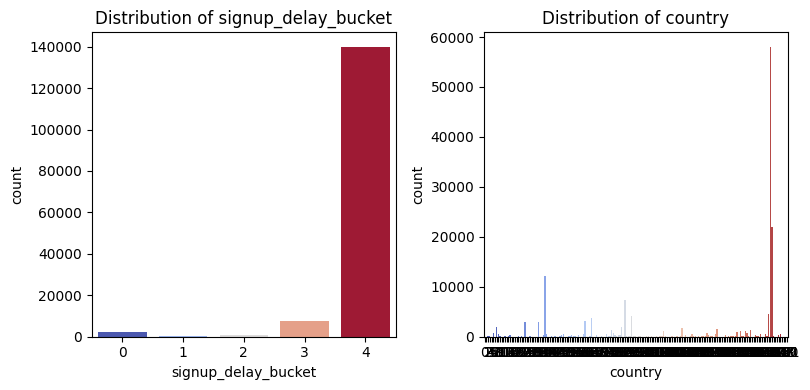

In [75]:
# Categorical Feature Distribution
plot_categorical_features = ['signup_delay_bucket', 'country']
plot_categorical(fraud_df, plot_categorical_features)

2025-02-17 10:25:59 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-17 10:25:59 - [✅ INFO] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


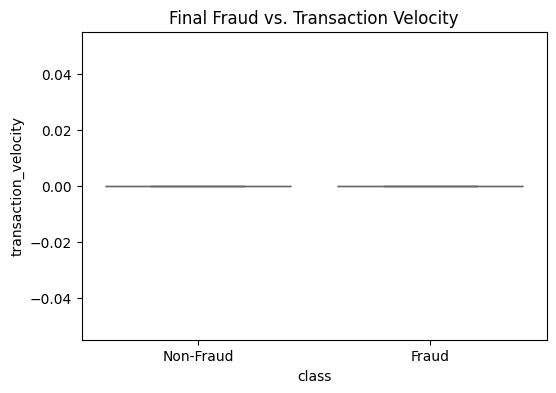

In [76]:
# Final Fraud vs Feature Interaction
plot_box(data=fraud_df, x='class', y='transaction_velocity', title="Final Fraud vs. Transaction Velocity", palette="Set3")

In [78]:
# Save Preprocessed Data
fraud_df.to_csv(os.path.join(DATAPATH, 'processed', "fraud_processed.csv"), index=False)

Feature Importance

In [79]:
from sklearn.ensemble import RandomForestClassifier

drop_columns = ['user_id', 'signup_time', 'purchase_time', 'device_id', 'country']
# Prepare Data
X_fraud = fraud_df.drop(columns=['class']+ drop_columns)
y_fraud = fraud_df['class']

# Fit Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_fraud, y_fraud)

RandomForestClassifier(random_state=42)

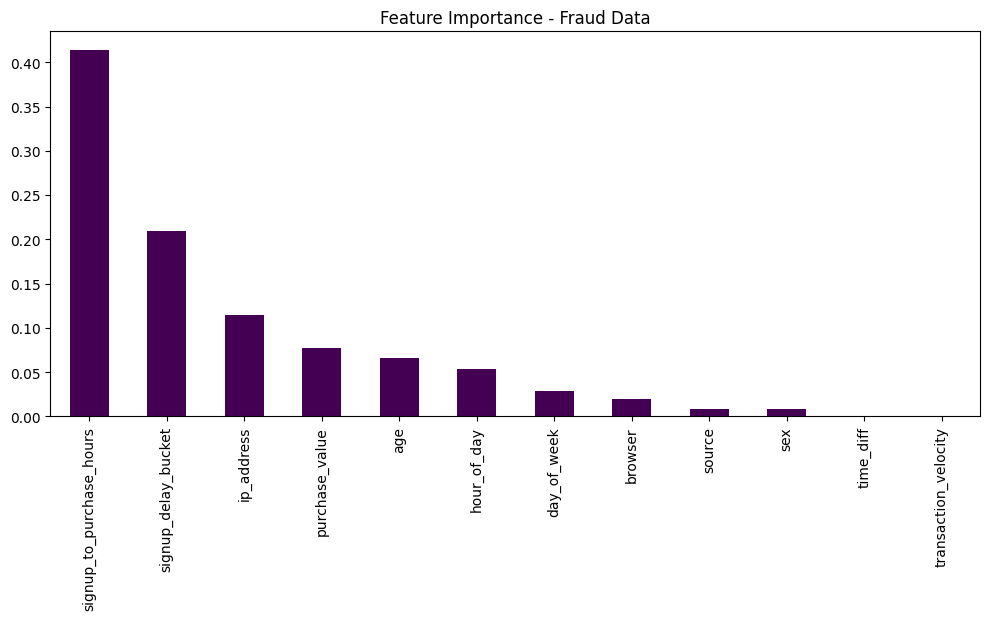

In [80]:
# Plot Feature Importances
plot_feature_importance(rf, X_fraud, title="Feature Importance - Fraud Data")

In [81]:
# Prepare Data
X_credit = credit_df.drop(columns=['Class'])
y_credit = credit_df['Class']

# Fit Model
rf.fit(X_credit, y_credit)

RandomForestClassifier(random_state=42)

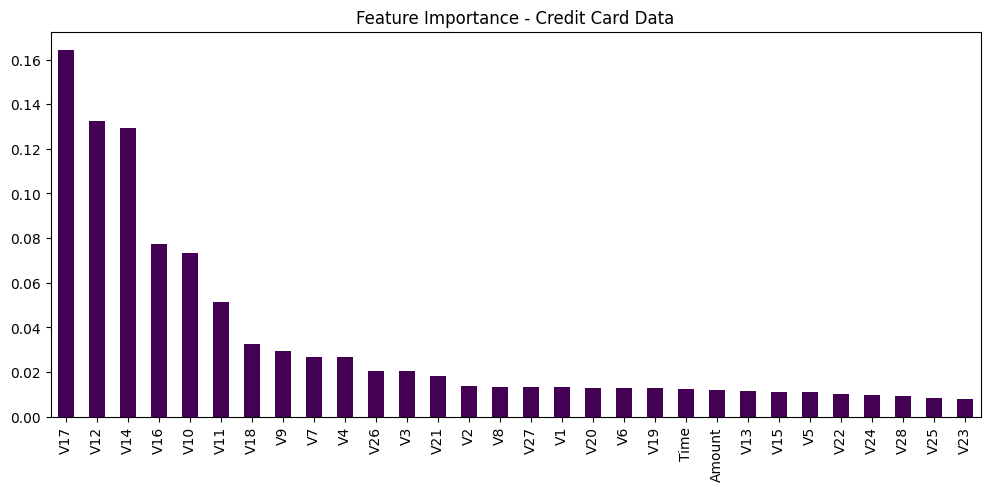

In [82]:
# Plot Feature Importances
plot_feature_importance(rf, X_credit, title="Feature Importance - Credit Card Data")